In [1]:
#Load the required libraries  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
sal = pd.read_csv('Salaries.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Get bastract of the dataset  
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148049 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            112495 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              38119 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [4]:
#Fetch the column names
sal.columns


Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [5]:
#Drop the unwanted columns from the dataset
sal.drop(columns = ['Notes','Status'], inplace = True)

In [6]:
sal

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco


# Lets do the EDA on the datset

## What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?


In [7]:
sal[sal.TotalPayBenefits==sal.TotalPayBenefits.min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,San Francisco


##Form this it is concluded that Joe Lopez is lowest paid person and its negative amount that is -618.13

# What was the average (mean) BasePay of all employees per year? (2011-2014) ?

In [8]:
t = sal[['BasePay','Year']]

In [9]:
t[t.Year==2011].BasePay.mean()

63595.956516774524

the average (mean) BasePay of all employees for year 2011 is 63595.956516774524

In [10]:
t[t.Year==2012].BasePay.mean()

65436.40685742255

The average (mean) BasePay of all employees for year 2012 is 65436.40685742255

In [11]:
t[t.Year==2013].BasePay.mean()

69630.0302164812

The average (mean) BasePay of all employees for year 2013 is 69630.0302164812

In [ ]:
x = t[t.Year==2014].BasePay 
x[x!='Not Provided'].astype('float').mean()

The average (mean) BasePay of all employees for year 2014 is 69630.030216481266564.42192449933


In [15]:
sal.head(2)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,San Francisco


#  How many unique job titles are there?

In [16]:
sal.JobTitle.nunique()

2159

There are 2159 unique job titles 

# What are the top 5 most common jobs? 

In [17]:
sal.JobTitle.value_counts().head()

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

The above are the 5 most common jobs.

# How many are there those work as a POLICE OFFICER III

In [18]:
sal[sal.JobTitle=='POLICE OFFICER III'].shape[0]

779

In [19]:
(sal.JobTitle=='POLICE OFFICER III').sum()

779

# In which department we have least employees?

In [20]:
sal[sal.JobTitle.str.find('DEPARTMENT')!=-1]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,San Francisco
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492,89062.9,134426,NaN,315981.05,315981.05,2011,San Francisco
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176933,86362.7,40132.2,NaN,303427.55,303427.55,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
21053,21054,PHOEBE LIM,MEDICAL STAFF SERVICES DEPARTMENT SPECIALIST,59924,0,0,NaN,59923.97,59923.97,2011,San Francisco
21054,21055,GLENDA YOUNG,MEDICAL STAFF SERVICES DEPARTMENT SPECIALIST,59923.8,0,0,NaN,59923.81,59923.81,2011,San Francisco
32623,32624,JAMES BARDEN,"BATTALION CHIEF, (FIRE DEPARTMENT)",0,1290.69,5802.68,NaN,7093.37,7093.37,2011,San Francisco
33884,33885,ROBERT DAVIS,DEPARTMENT HEAD I,0,0,3783,NaN,3783.00,3783.00,2011,San Francisco


## Employees with name GARDNER in it and their Total Pay  percentage wise ditribution
## show it on both bar and pie

In [ ]:
d1 = sal[sal.EmployeeName.str.find('GARDNER')!=-1]

In [ ]:
d1

In [ ]:
plt. pie(d1.TotalPay, autopct = '%.f%%')
plt.show()

In [ ]:
plt.bar(d1.EmployeeName, d1.TotalPay )
plt.xticks(rotation=90)

In [ ]:
plt.pie(sal.JobTitle.value_counts().head(), autopct = '%.f%%', labels =sal.JobTitle.head())
plt.xticks
plt.show()

# top paid 5 job titles and their occurence distribution in DF

In [4]:
sorted(sal.TotalPayBenefits,reverse = True)

[567595.43,
 538909.28,
 510732.68,
 479652.21,
 436224.36,
 425815.28,
 422353.4,
 418019.22,
 417435.1,
 415767.94,
 407274.78,
 404167.27,
 401736.88,
 401070.87,
 398984.53,
 398421.67,
 396778.68,
 395632.03,
 395361.86,
 395334.45,
 393990.13,
 391362.3,
 389496.02,
 386807.48,
 386168.49,
 386109.21,
 383746.78,
 381697.8,
 381643.11,
 379918.72,
 376071.59,
 376002.11,
 374846.83,
 374690.64,
 374597.99,
 374260.34,
 374214.87,
 374083.49,
 372411.97,
 371608.35,
 371531.92,
 370464.42,
 369463.56,
 369309.16,
 368400.67,
 368152.0,
 367832.59,
 367509.32,
 366406.55,
 366322.23,
 365782.44,
 365561.14,
 365548.28,
 364888.03,
 364814.51,
 363393.7,
 362551.66,
 362306.21,
 362073.36,
 360443.81,
 360070.78,
 359467.26,
 359447.75,
 358728.65,
 358613.48,
 357867.54,
 357340.28,
 355299.86,
 355299.82,
 354885.15,
 353797.13,
 353241.69,
 352343.22,
 352046.11,
 351617.08,
 351254.78,
 350415.53,
 350310.93,
 350082.24,
 349527.75,
 348509.37,
 348410.9,
 348410.87,
 348275.23,

In [7]:
temp = sal[sal.TotalPayBenefits>425815.28]

In [6]:
temp.JobTitle.value_counts()

Asst Med Examiner                                 1
Chief Investment Officer                          1
CAPTAIN III (POLICE DEPARTMENT)                   1
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    1
Deputy Chief 3                                    1
Name: JobTitle, dtype: int64

In [ ]:
temp.JobTitle

In [8]:
(sal.JobTitle=='GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY').sum()

2

In [9]:
l = []
for i in temp.JobTitle:
    l.append((sal.JobTitle==i).sum())
print(l)

[2, 37, 21, 12, 1]


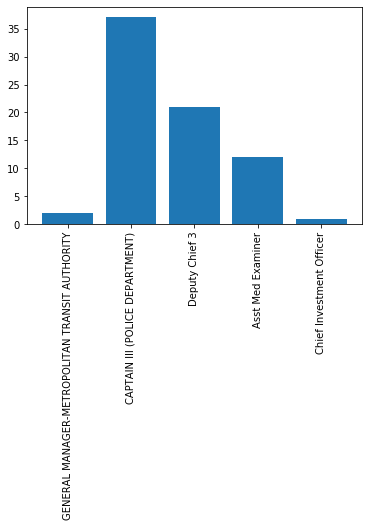

In [11]:
plt.bar(temp.JobTitle,l)
plt.xticks(rotation=90)
plt.show()

# Plot.the % distribustion of Yearwise TotalPay



In [12]:
list(sal.groupby('Year'))

[(2011,           Id        EmployeeName  \
  0          1      NATHANIEL FORD   
  1          2        GARY JIMENEZ   
  2          3      ALBERT PARDINI   
  3          4   CHRISTOPHER CHONG   
  4          5     PATRICK GARDNER   
  ...      ...                 ...   
  36154  36155       SERENA HUGHES   
  36155  36156        JOE BROWN JR   
  36156  36157      PAULETTE ADAMS   
  36157  36158       KAUKAB MOHSIN   
  36158  36159  JOSEPHINE MCCREARY   
  
                                               JobTitle BasePay OvertimePay  \
  0      GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411           0   
  1                     CAPTAIN III (POLICE DEPARTMENT)  155966      245132   
  2                     CAPTAIN III (POLICE DEPARTMENT)  212739      106088   
  3                WIRE ROPE CABLE MAINTENANCE MECHANIC   77916     56120.7   
  4        DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134402        9737   
  ...                                               ...     .

In [13]:
tp = sal.groupby('Year').get_group(2011)
tp

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36154,36155,SERENA HUGHES,SWIMMING INSTRUCTOR/POOL LIFEGUARD,0,0,4.17,NaN,4.17,4.17,2011,NaN,San Francisco,NaN
36155,36156,JOE BROWN JR,TRANSIT OPERATOR,0,0,0.3,NaN,0.30,0.30,2011,NaN,San Francisco,NaN
36156,36157,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0,0,0,NaN,0.00,0.00,2011,NaN,San Francisco,NaN
36157,36158,KAUKAB MOHSIN,TRANSIT OPERATOR,0,0,0,NaN,0.00,0.00,2011,NaN,San Francisco,NaN


In [14]:
t11 = []
t11.append (tp.TotalPay.sum())
t11

[2594195051.88]

In [15]:
tp1 = sal.groupby('Year').get_group(2012)
tp1

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128809,220909,13126.3,44430.1,362844.66,407274.78,2012,NaN,San Francisco,NaN
36160,36161,Gregory Suhr,Chief of Police,302578,0,18974.1,69810.2,321552.11,391362.30,2012,NaN,San Francisco,NaN
36161,36162,Khoa Trinh,Electronic Maintenance Tech,111921,146415,78057.4,53102.3,336393.73,389496.02,2012,NaN,San Francisco,NaN
36162,36163,Joanne Hayes-White,"Chief, Fire Department",296943,0,17816.6,72047.9,314759.60,386807.48,2012,NaN,San Francisco,NaN
36163,36164,Frederick Binkley,EMT/Paramedic/Firefighter,126863,192424,17917.2,44438.2,337204.86,381643.11,2012,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72920,72921,Charles Williams,Junior Clerk,-30.58,45.87,0,1.36,15.29,16.65,2012,NaN,San Francisco,NaN
72921,72922,John Carajan,General Laborer,0,0,0,12.9,0.00,12.90,2012,NaN,San Francisco,NaN
72922,72923,John Draper,Clerk,-9.5,14.25,0,0.42,4.75,5.17,2012,NaN,San Francisco,NaN
72923,72924,Cherise Wong,Special Nurse,0,0,3.28,0.88,3.28,4.16,2012,NaN,San Francisco,NaN


In [16]:
t11.append(tp1.TotalPay.sum())
t11

[2594195051.88, 2724848200.44]

In [17]:
t11.append(sal.groupby('Year').get_group(2013).TotalPay.sum())


In [18]:
t11

[2594195051.88, 2724848200.44, 2918655930.8]

In [19]:
t11.append(sal.groupby('Year').get_group(2014).TotalPay.sum())

In [20]:
t11

[2594195051.88, 2724848200.44, 2918655930.8, 2876910951.2599998]

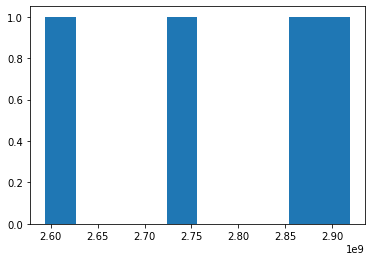

In [22]:
plt.hist(t11)
plt.show()

# How much average basepay is given to employees inthe year 2013

In [ ]:
sal.groupby('Year')['TotalPay'].sum().plot(kind = 'pie', autopct = '%.f%%')

In [ ]:
import math
f,w = math.modf(2.5)
f,w

In [ ]:
sal.drop(labels = [148646],inplace=True)

In [ ]:
sal.BasePay.astype('float')